# Task 1: Import packages and Load data

In [75]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

In [5]:
path = 'C:\\Users\\Administrator\\Desktop\\Project\\Project - Sales analysis\\dataset'
sales_data = pd.read_csv(path + '\\sales2019_1.csv')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# Task 2: Clean and Preprocess data

## Task 2.1: Merge 12-month data

In [6]:
# Retrieve the path of sales files for 12 months
# file_paths = []
# for file in os.listdir(path):
#     file_path = os.path.join(path, file)
#     file_paths.append(file_path)
# file_paths

# Concatenating 12 sales tables of 12 months
data_frames = []
for file in os.listdir(path):
    file_path = os.path.join(path, file) # create path for each file
    df1 = pd.read_csv(file_path) # create dataframe for each file
    data_frames.append(df1) #add data frame to the data_frames 
    result = pd.concat(data_frames)

In [7]:
# dataframe storage
df = result
df.to_csv('annual_sales_2019.csv', index = False)

In [8]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## Task 2.2: Add month column

In [10]:
# Get the month from the order date column
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')
df['Month'] = df['Order Date'].dt.month
# Remove empty values
df.dropna(subset=['Order Date'], inplace=True)
# Convert to integer.
df['Month'] = df['Month'].astype(int)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


# Task 3: Reporting

## Task 3.1: What was the best month for sales? How much was earned that month?

In [11]:
# Convert the data type of the two columns 'Quantity Ordered' and 'Price Each' to interger
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float64')
# Calculate the sales of each order
df['Sale'] = df['Quantity Ordered'] * df['Price Each']	
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [12]:
# Aggregate sales per month
sale_month = df.groupby('Month')['Sale'].sum().reset_index()
sale_month.rename(columns={'Sale': 'Total_Sale'}, inplace=True)
sale_month

,Month,Total_Sale
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [13]:
# Highest monthly sales
sale_month[sale_month['Total_Sale'] == max(sale_month['Total_Sale'])]

,Month,Total_Sale
11,12,4613443.34


Text(0.5, 1.0, 'Sales revenue for 12 months')

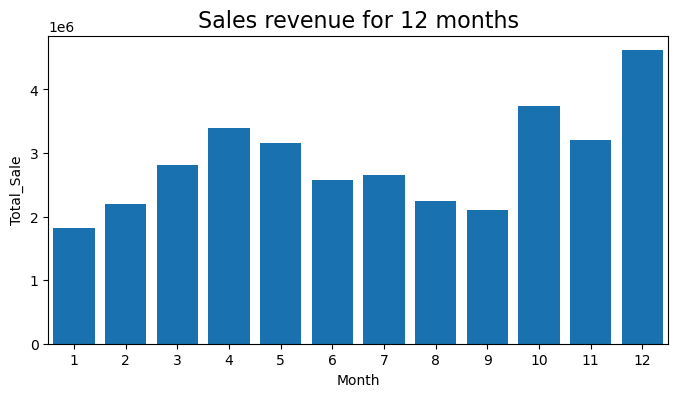

In [14]:
# Draw a chart showing sales
plt.figure(figsize = (8,4))
sns.barplot(sale_month, x="Month", y="Total_Sale", color = "#0077c8")

# Title
plt.title('Sales revenue for 12 months', fontsize = 16)

## Task 3.2: What city has the best sales 

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99


In [16]:
# Create a function to get the city name from the 'Purchase Address' column
# def getCity(address):
#     return address.split(',')[1]
address_to_city = lambda address: address.split(',')[1]

In [17]:
# create new column
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [18]:
# Total city revenue
sale_city = df.groupby('City')['Sale'].sum().reset_index()
sale_city.rename(columns={'Sale': 'Total_Sale'}, inplace=True)
sale_city

,City,Total_Sale
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


In [19]:
# The city with the highest revenue
sale_city[sale_city['Total_Sale'] == max(sale_city['Total_Sale'])]

,City,Total_Sale
7,San Francisco,8262203.91


Text(0.5, 1.0, 'Revenue of cities')

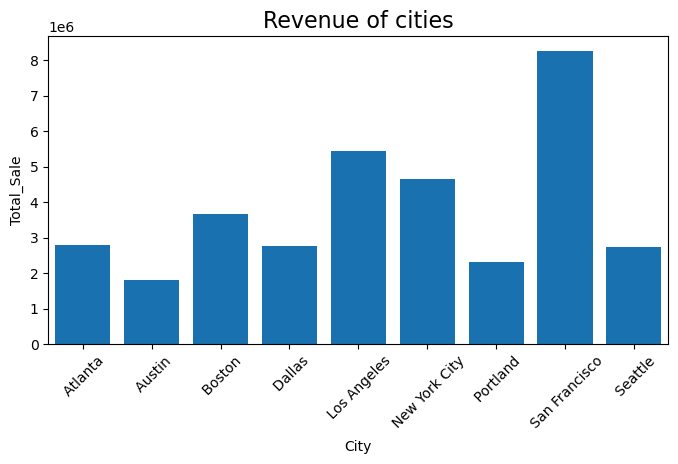

In [20]:
# Draw a chart showing sales
plt.figure(figsize = (8,4))
sns.barplot(sale_city, x="City", y="Total_Sale", color = "#0077c8")
plt.xticks(rotation = 45)
# Title
plt.title('Revenue of cities', fontsize = 16)

# Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product?

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [22]:
# Extract product sale hours data from 'Order Date' column
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hours
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11


In [23]:
# Total number of sales orders per hour
sale_hours = df.groupby('Hours')['Order ID'].count().reset_index()
sale_hours.rename(columns={'Order ID': 'Total_Orders'}, inplace=True)
sale_hours

,Hours,Total_Orders
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


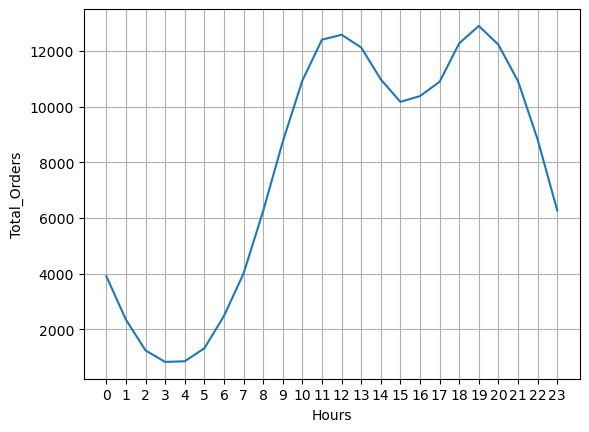

In [24]:
x = sale_hours['Hours']
sns.lineplot(data=sale_hours, x="Hours", y="Total_Orders")
plt.grid()
values = [i for i in range(24)]
_ = plt.xticks(x, values)

## Task 3.4: What products are most often sold together?

In [79]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hours
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11


In [86]:
# Group data by order ID and create a product list for each order ID
order_product = df.groupby('Order ID')['Product'].apply(list).reset_index()
order_product

,Order ID,Product
0,141234,[iPhone]
1,141235,[Lightning Charging Cable]
2,141236,[Wired Headphones]
3,141237,[27in FHD Monitor]
4,141238,[Wired Headphones]
...,...,...
178432,319666,[Lightning Charging Cable]
178433,319667,[AA Batteries (4-pack)]
178434,319668,[Vareebadd Phone]
178435,319669,[Wired Headphones]


In [87]:
# Create a Counter to count the frequency of product pairs
pair_counts = Counter()

# Browse each product group 
for products in order_product['Product']:
    # If there are at least 2 products in that Order ID
    if len(products) > 1:
        pairs = combinations(products, 2)
        pair_counts.update(pairs)
pair_counts

Counter({('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('iPhone', 'Wired Headphones'): 447,
         ('Google Phone', 'Wired Headphones'): 414,
         ('Vareebadd Phone', 'USB-C Charging Cable'): 361,
         ('iPhone', 'Apple Airpods Headphones'): 360,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('USB-C Charging Cable', 'Wired Headphones'): 160,
         ('Vareebadd Phone', 'Wired Headphones'): 143,
         ('Lightning Charging Cable', 'Wired Headphones'): 92,
         ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81,
         ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80,
         ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77,
         ('Apple Airpods Headphones', 'Wired Headphones'): 69,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55,
         ('Lightning Charging Cable'

In [89]:
# Create a DataFrame from the results
pairs_list = [[pair, count] for pair, count in pair_counts.items()]
pairs_df = pd.DataFrame(pairs_list, columns=['Pair', 'Count'])

# Display results and see which pair is sold the most
pairs_df.sort_values(by='Count', ascending=False)

,Pair,Count
11,"(iPhone, Lightning Charging Cable)",1005
3,"(Google Phone, USB-C Charging Cable)",987
7,"(iPhone, Wired Headphones)",447
17,"(Google Phone, Wired Headphones)",414
14,"(Vareebadd Phone, USB-C Charging Cable)",361
...,...,...
276,"(LG Dryer, Wired Headphones)",1
279,"(27in FHD Monitor, LG Washing Machine)",1
280,"(LG Dryer, 27in FHD Monitor)",1
281,"(20in Monitor, 34in Ultrawide Monitor)",1


## Task 3.5: What product sold the most? Why do you think it sold the most?

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hours
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11


In [60]:
# total quantity for each product
sale_quantity = df.groupby('Product')['Quantity Ordered'].sum().reset_index()
sale_quantity.rename(columns={'Quantity Ordered': 'Total Quantity Ordered'}, inplace=True)
sale_quantity

,Product,Total Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


Text(0.5, 1.0, 'Number of orders')

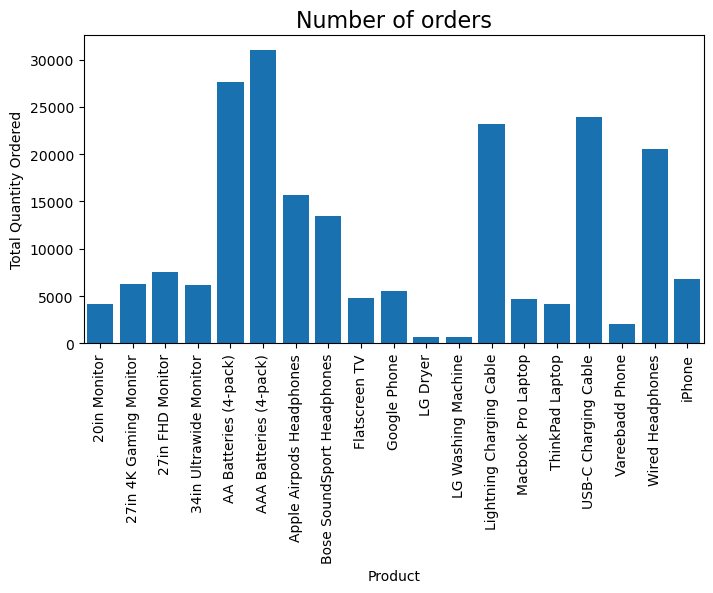

In [35]:
# Draw a chart showing sales
plt.figure(figsize = (8,4))
sns.barplot(sale_quantity, x="Product", y="Total Quantity Ordered", color = "#0077c8")
plt.xticks(rotation = 90)
# Title
plt.title('Number of orders', fontsize = 16)

In [61]:
# What effect does price have on product sales?
price_each = df.groupby('Product')['Price Each'].mean().reset_index()
price_each

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6164\1134495355.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x, rotation=90, size = 10)


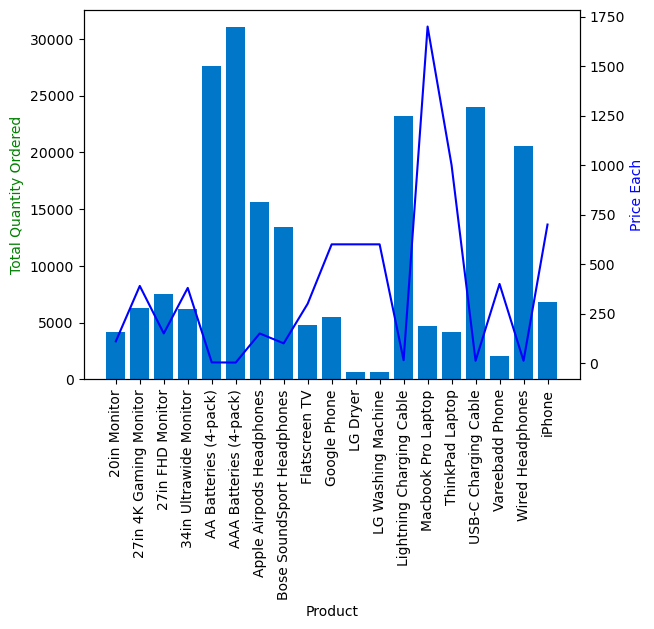

In [59]:
x = sale_quantity['Product']
y1 = sale_quantity['Total Quantity Ordered']
y2 = price_each['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color = '#0077c8')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(x, rotation=90, size = 10)
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()